In [2]:
#Hypothesis testing

Hypothesis Testing : It is a statistical method used to maake inferences about a population parameter based on a sample data. It involves comparing two competing hypothesis: The null hypothesis (H0) & the alternate hhypothesis (H1). The goal is to determine whether there is enough evidence in the sample data to reject the null hypothesis in favor of the alternative hypothesis.

Example:
Suppose a university claims that the average GPA of its students is 3.0. You, as a data scientist, want to investigate whether the average GPA of the students at this university is different from 3.0.

Step-1: Formulate Hypotheses:
H0 : The average GPA of the university's students is 3.0.
H1 : The average GPA of the university's students is not equal to 3.0.

Step 2:Choose a significance level (α):This determines the propability of making a Type 11 error, whichh is rejecting the null hypohesis when it actually true. Common choice of alpha includes 0.05 & 0.01.

Step 3: Collect the sample data from the random sample of 50 students at the university and calculate the sample mean GPA. Lets see its 3.2.

Step 4: Select the test statistics. : Choose a test statistics that is appropriate for the hypothesis being tested. Since we are comparing ansample mean to a population mean and sample size is relatively large, we can use z test.

Step 5: Compute the Test Statistic:
Calculate the Z-test statistic using the formula:

Step 6: Determine the critical region:
Based on the choosen significance level and null hhypothesis, fing the critical values or critical regin from a standard normal distribution table.

Step 7: Make a Decision:

If the absolute value of the test statistic is greater than the critical value, reject the null hypothesis.
If the absolute value of the test statistic is less than or equal to the critical value, fail to reject the null hypothesis.




In [3]:
from scipy import stats
import numpy as np

# Sample data
sample_mean = 3.2
population_mean = 3.0
sample_std = 0.5
sample_size = 50

# Calculate the Z-test statistic
z_stat = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

# Define the significance level (alpha)
alpha = 0.05

# Calculate the critical values for a two-tailed test
critical_value_left = stats.norm.ppf(alpha/2)
critical_value_right = stats.norm.ppf(1 - alpha/2)

# Print the calculated Z-test statistic and critical values
print("Z-test statistic:", z_stat)
print("Critical values (left and right):", critical_value_left, critical_value_right)

# Perform hypothesis testing
if z_stat < critical_value_left or z_stat > critical_value_right:
    print("Reject null hypothesis. There is sufficient evidence to suggest that the average GPA differs from 3.0.")
else:
    print("Fail to reject null hypothesis. There is not sufficient evidence to suggest that the average GPA differs from 3.0.")


Z-test statistic: 2.8284271247461925
Critical values (left and right): -1.9599639845400545 1.959963984540054
Reject null hypothesis. There is sufficient evidence to suggest that the average GPA differs from 3.0.


In [4]:
z_stat

2.8284271247461925

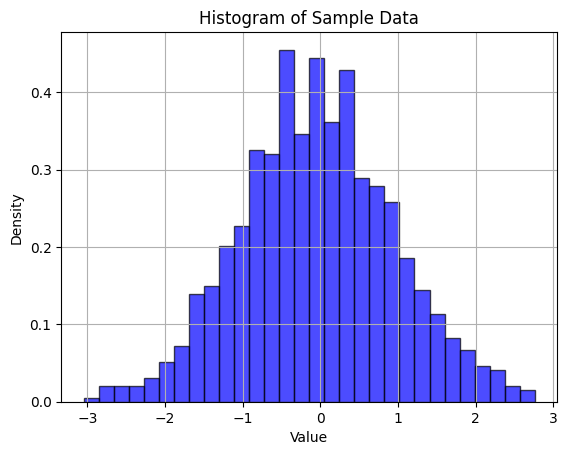

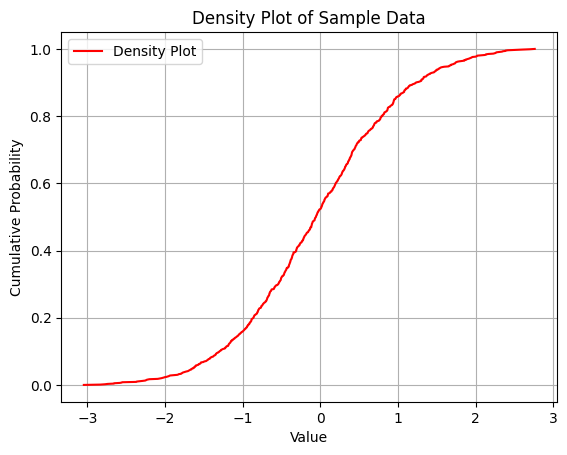

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data (normal distribution)
np.random.seed(0)
sample_data = np.random.normal(loc=0, scale=1, size=1000)

# Plot histogram
plt.hist(sample_data, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Sample Data')
plt.grid(True)
plt.show()

# Plot density plot
plt.figure()
plt.plot(np.sort(sample_data), np.linspace(0, 1, len(sample_data)), color='red', label='Density Plot')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Density Plot of Sample Data')
plt.legend()
plt.grid(True)
plt.show()

# SARIMA (Seasonal Autoregressive Moving Average)

Where ARIMA accepts the parameters (p,d,q), SARIMA accepts an additional set of parameters (P,D,Q)m that describes the seasonal components.

P, D & Q represents the seasonal regression, differencing and moving average coefficients and m represents the number of data points (rows) in each seasonal cycle. (If i have monthly data for an yearly seasonal cycle, then m=12)

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
!pip install pmdarima
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00


In [7]:
# Load dataset
df = pd.read_csv('/content/sample_data/co2_mm_mlo.csv')

In [8]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [9]:
df['Date'] = pd.to_datetime({
    'year':df['year'],
    'month':df['month'],
    'day':1
})

In [10]:
df.head()

,year,month,decimal_date,average,interpolated,Date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   Date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [12]:
df = df.set_index('Date')
df.index.freq = 'MS'

<Axes: xlabel='Date'>

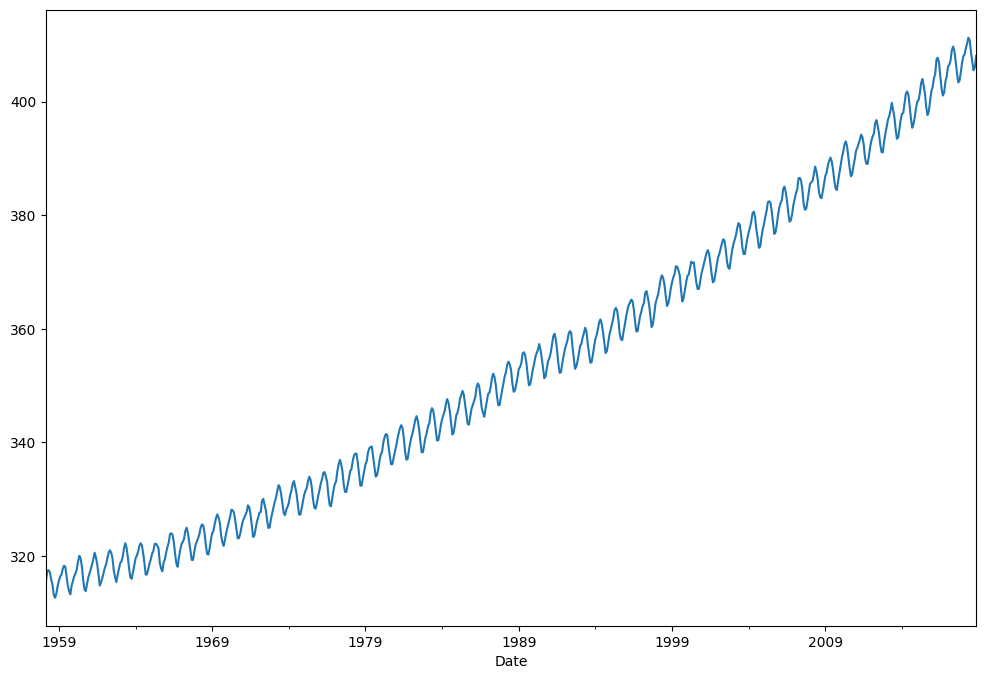

In [13]:
df['interpolated'].plot(figsize=(12,8))

In [14]:
result  = seasonal_decompose(df['interpolated'],model='add')

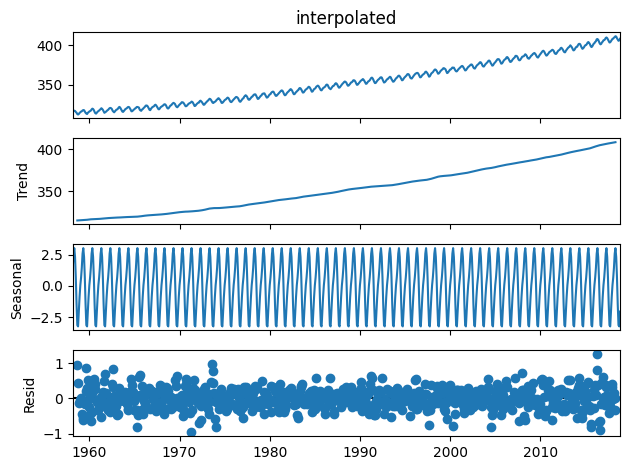

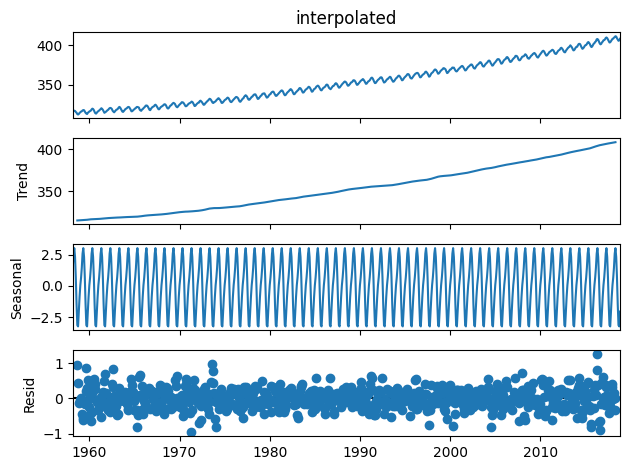

In [15]:
result.plot()

In [16]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.252
Date:                            Fri, 10 May 2024   AIC                            424.504
Time:                                    10:44:24   BIC                            452.046
Sample:                                03-01-1958   HQIC                           435.132
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3554      0.098      3.622      0.000       0.163       0.548
ar.L2          0.0893      0.050      1.784      0.074      -0.009       0.187
ma.L1         -0.7106      0.094     -7.538      0.000      -0.895      -0.526
ar.S.L12       0.9996      0.000   2582.013      0.000       0.999       1.000
ma.S.L12      -0.8672      0.021    -40.746      0.000      -0.909      -0.826
sigma2         0.0956      0.005     20.974      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.50
Prob(Q):                              0.79   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
train = df.iloc[:717]
test = df.iloc[717:]

In [18]:
model = SARIMAX(train['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))

In [19]:
results = model.fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.881
Date:                            Fri, 10 May 2024   AIC                            415.762
Time:                                    10:45:11   BIC                            443.204
Sample:                                03-01-1958   HQIC                           426.359
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3486      0.059      5.878      0.000       0.232       0.465
ar.L2          0.0841      0.034      2.495      0.013       0.018       0.150
ma.L1         -0.7033      0.056    -12.586      0.000      -0.813      -0.594
ar.S.L12       0.9996      0.000   2957.088      0.000       0.999       1.000
ma.S.L12      -0.8659      0.023    -38.291      0.000      -0.910      -0.822
sigma2         0.0952      0.005     20.482      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.72
Prob(Q):                              0.81   Prob(JB):                         0.09
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
start = len(train)
end = len(train)+len(test)-1

In [22]:
predictions = results.predict(start,end,typ='levels').rename('SARIMA Predictions')

<Axes: xlabel='Date'>

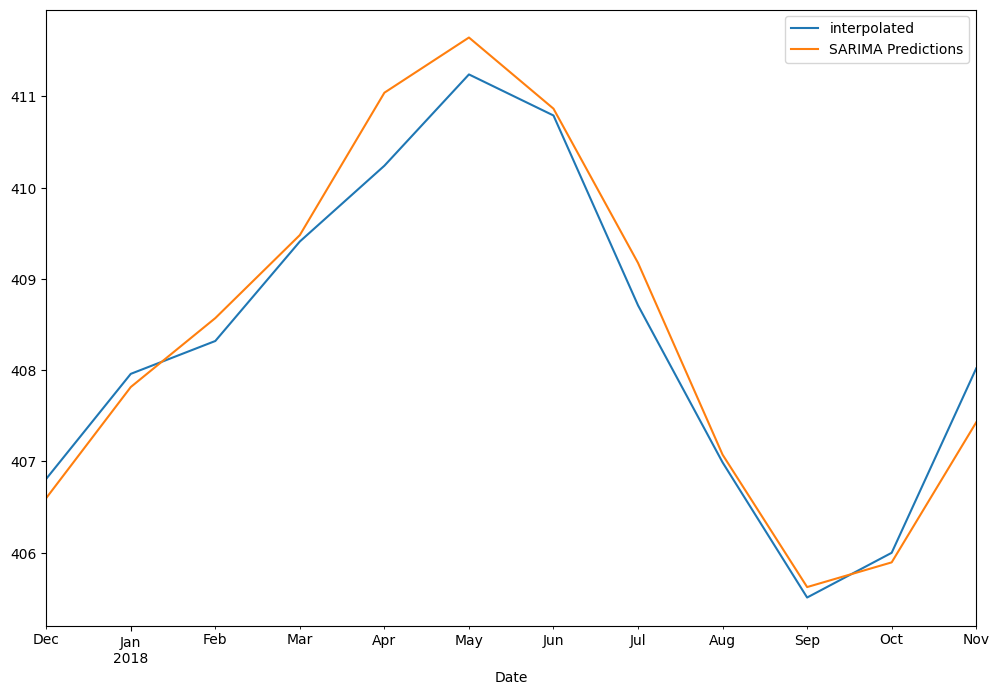

In [23]:
test['interpolated'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [24]:
from statsmodels.tools.eval_measures import rmse
error = rmse(test['interpolated'],predictions)
error

0.3580340251481969

In [25]:
test['interpolated'].mean()

408.3333333333333

In [26]:
model = SARIMAX(df['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))
results = model.fit()

In [27]:
fcast = results.predict(len(df),len(df)+11,typ = 'levels').rename('SARIMA FORECAST')

<Axes: xlabel='Date'>

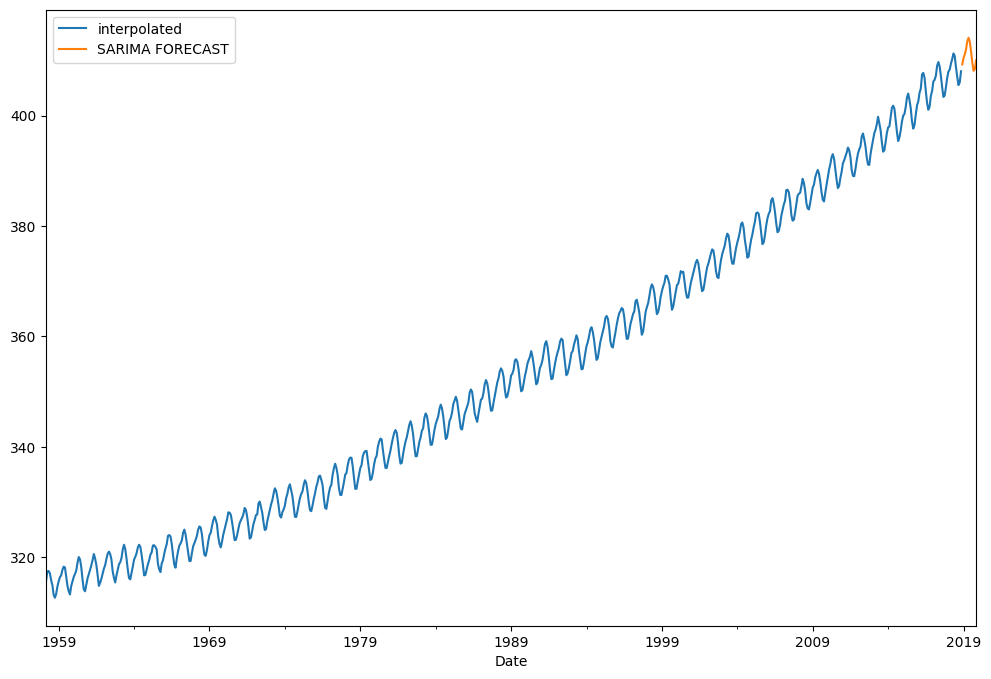

In [28]:
df['interpolated'].plot(legend=True,figsize=(12,8))
fcast.plot(legend=True)

In [29]:
#SARIMAX Model : SARIMA With Exogenus Variables

In [31]:
df = pd.read_csv('/content/sample_data/RestaurantVisitors.csv',index_col='date',parse_dates=True)
df.index.freq  = 'D'

In [32]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [33]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [34]:
df1 = df.dropna()
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [35]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [36]:
cols = ['rest1', 'rest2', 'rest3',
       'rest4', 'total']
for column in cols:
  df1[column]  =  df1[column].astype(int)

In [37]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


<Axes: xlabel='date'>

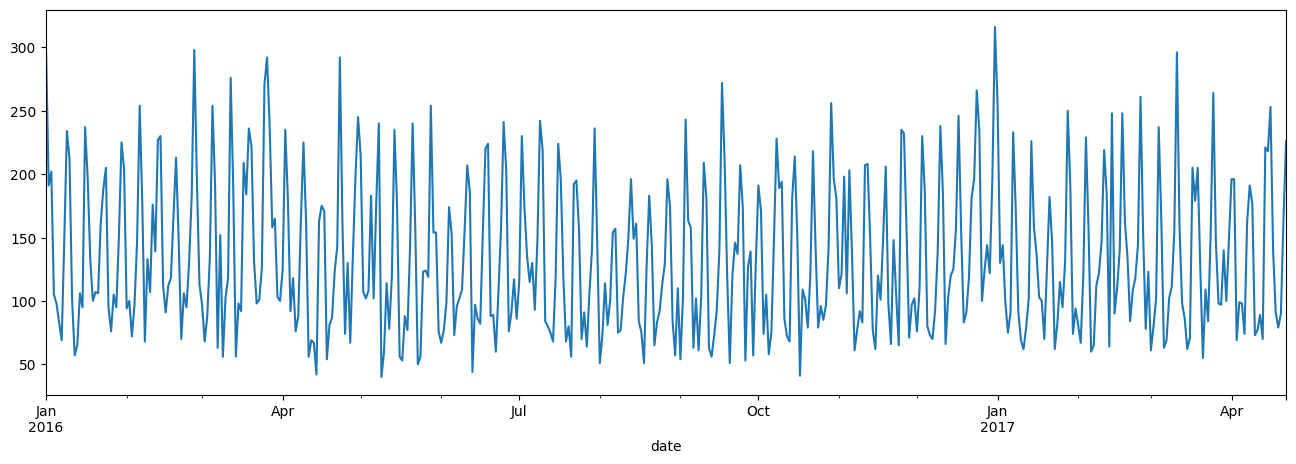

In [38]:
df1['total'].plot(figsize=(16,5))

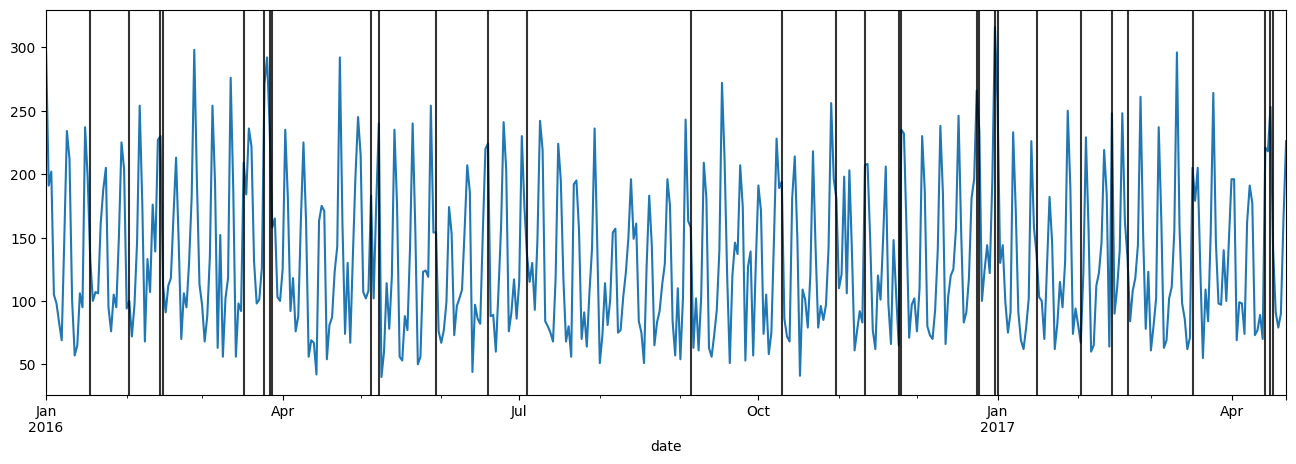

In [39]:
ax = df1['total'].plot(figsize=(16,5))

for day in df1.query('holiday==1').index:
  ax.axvline(x=day,color='black',alpha=0.8);


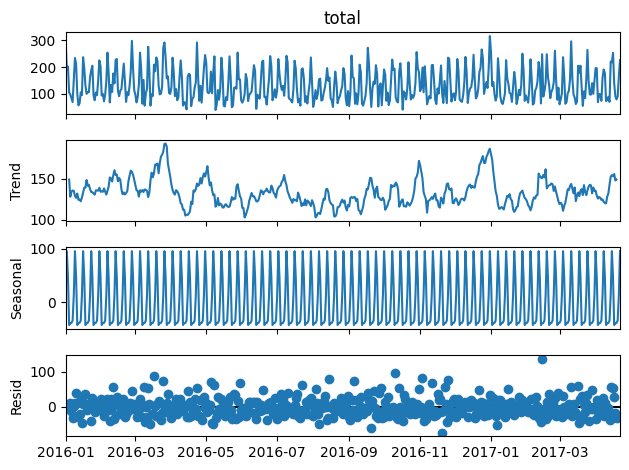

In [40]:
result = seasonal_decompose(df1['total'])
result.plot();

<Axes: xlabel='date'>

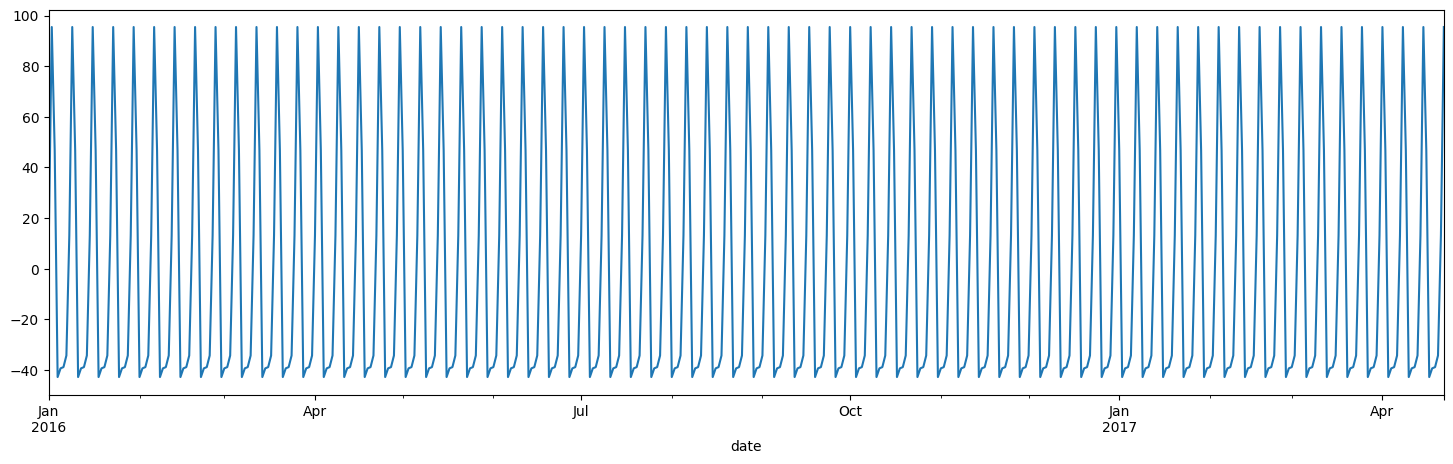

In [41]:
result.seasonal.plot(figsize=(18,5))

In [42]:
train  = df1.iloc[:436]
test = df1.iloc[436:]

In [43]:
auto_arima(df1['total'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2387.058
Date:                   Fri, 10 May 2024   AIC                           4782.116
Time:                           10:46:59   BIC                           4798.794
Sample:                       01-01-2016   HQIC                          4788.673
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.3855      1.996      3.199      0.001       2.473      10.298
ar.S.L7        0.9525      0.015     64.998      0.000       0.924       0.981
ma.S.L7       -0.7142      0.052    -13.682      0.000      -0.817      -0.612
sigma2      1259.6765     76.659     16.432      0.000    1109.429    1409.924
===================================================================================
Ljung-Box (L1) (Q):                  16.23   Jarque-Bera (JB):                54.97
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.70
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
model = SARIMAX(train['total'],order=(1,0,1),enforce_invertibility=False)

In [51]:
result  = model.fit()

In [52]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  total   No. Observations:                  436
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -2440.400
Date:                Fri, 10 May 2024   AIC                           4886.800
Time:                        11:05:53   BIC                           4899.033
Sample:                    01-01-2016   HQIC                          4891.628
                         - 03-11-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9010      0.023     38.913      0.000       0.856       0.946
ma.L1          0.0057      0.060      0.094      0.925      -0.112       0.124
sigma2      4241.9988    303.238     13.989      0.000    3647.663    4836.334
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):                 1.56
Prob(Q):                              0.27   Prob(JB):                         0.46
Heteroskedasticity (H):               0.96   Skew:                             0.10
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
start = len(train)
end = len(train)+len(test)-1

In [54]:
predictions = results.predict(start,end).rename('SARIMA Model')

<Axes: xlabel='Date'>

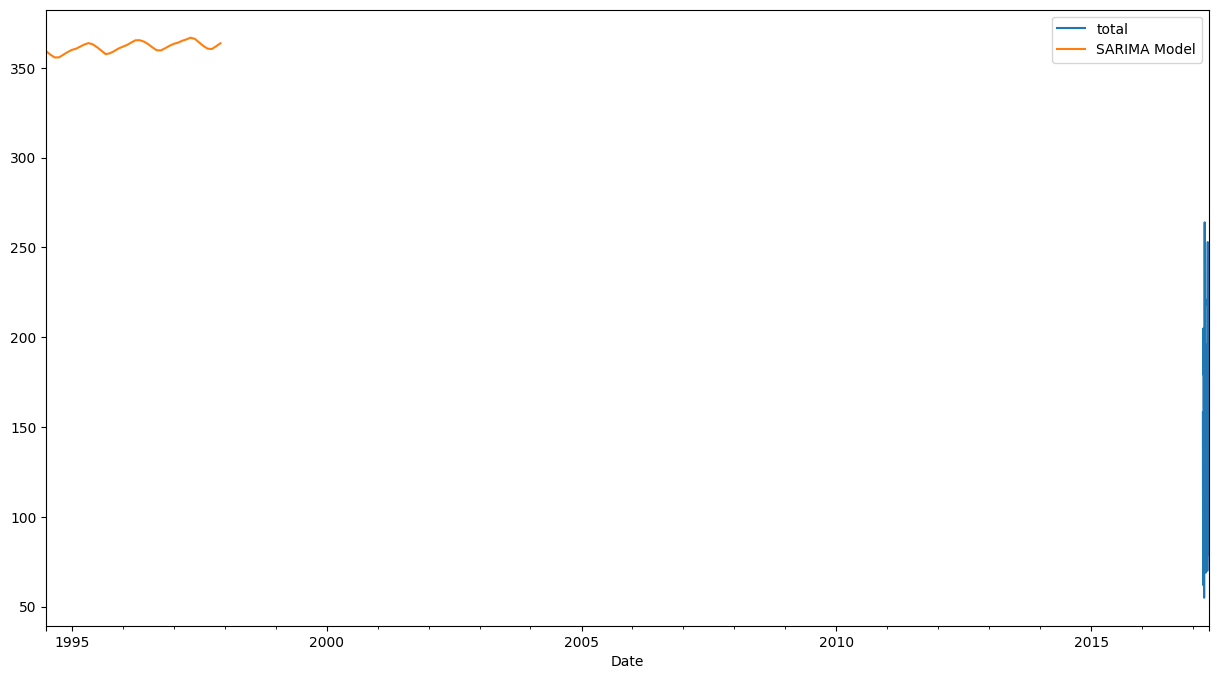

In [55]:
test['total'].plot(legend=True,figsize=(15,8))
predictions.plot(legend=True)